## improve k-means

In [3]:
# -*- coding: utf-8 -*-
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

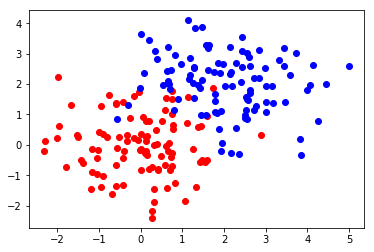

In [4]:
# data generation 
n = 100
x1 = np.random.randn(n,2)
x2 = np.random.randn(n,2) + [2,2]
plt.figure()
plt.plot(x1[:,0],x1[:,1],'ro')
plt.plot(x2[:,0],x2[:,1],'bo')
plt.show()

   **传统的kmeans算法不能很好的解决初始点的选取问题，对于kmeans的改进已经有很多研究，本次作业选择David Arthur and Sergei Vassilvitskii提出的kmeans++方法对kmeans进行改进，算法步骤如下：**
   + 从待分类的点集中，随机选出中心点$c_1$
   + 定义$D(x)$为样本到已有聚类中心的最短距离。计算每个样本被选取为下一个距离类中心的概率$\frac{D(x)^2}{sum_{x\in\chi}D(x)^2}$,
   最后按照轮盘法选择出最后一个聚类中心。
   + 重复第二个步骤知道选出所有的聚类中心
   + 接下来的步骤与k均值聚类相同

**改进的代码如下：**

随机模拟的初始分类


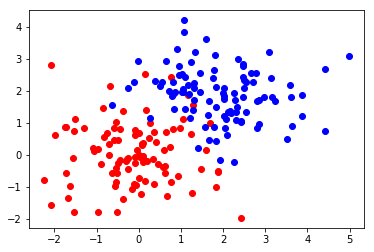

kmeans++的分类结果


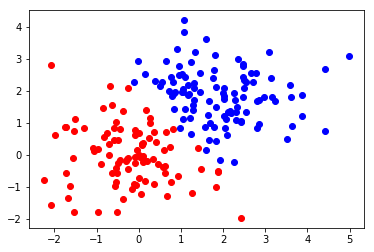

In [5]:
#encoding = 'utf-8'
#K-means++
from pylab import *
from numpy import *
import matplotlib.pyplot as plt

# data generation 
n = 100
x1 = np.random.randn(n,2)
x2 = np.random.randn(n,2) + [2,2]
X = vstack((x1,x2))
print('随机模拟的初始分类')
plt.figure()
plt.plot(x1[:,0],x1[:,1],'ro')
plt.plot(x2[:,0],x2[:,1],'bo')
plt.show()


#欧氏距离
def distance(x1,x2):
    return sqrt(sum(power(x1-x2,2)))
 
#计算最近的距离
def nearest(point, cluster_centers):
    min_dist = inf
    m = np.shape(cluster_centers)[0]  #已知的初始聚类中心点
    for i in range(m):
        #分别计算样本点到每个初始聚类点的距离
        d = distance(point, cluster_centers[i, ])
        #找到最小的距离
        if min_dist > d:
            min_dist = d
    return min_dist

#计算初始聚类点
def get_centroids(X, k):
    m, n = np.shape(X)

    #初始化聚类点
    cluster_centers = np.zeros((k , n))
    #随机产生第一个聚类点
    index = np.random.randint(0, m)
    cluster_centers[0,] = X[index, ]
    
    #初始化距离
    d = [0.0 for _ in range(m)]
    for i in range(1, k):#[1]
        sum_all = 0
        for j in range(m):#m=200
            #样本点与已知聚类中心的最短距离
            d[j] = nearest(X[j, ], cluster_centers[0:i, ])
            # 加总最短距离
            sum_all += d[j]
        #计算每个样本点被抽到的权重（概率）
        weigths = d/sum_all
        #以该权重抽取样本
        index2 = np.random.choice(m,1, p=weigths)
        cluster_centers[i,:] = X[index2,]
    return cluster_centers


def kmeans_plus_plus(X,k):
    n,m = X.shape
    #计算初始聚类点
    cluster_centers = get_centroids(X, k)
    #计算欧式距离
    count = 1000
    while count>0:
        dist_all = []
        for each in X:
            dist = []
            for i in range(k):
               dis = distance(each,cluster_centers[i,])
               dist.append(dis)
            dist_all.append(dist)
            dis = array(dist_all)
            idx = argmin(dis,axis = 1)
        #计算新的聚类中心
        cluster_centers=np.zeros((k , m))
        for j in arange(k):
            cluster_centers[j,:] = mean(X[idx==j,:],axis=0)
        count -= 1
    return idx

#作图
k = 2   
idx= kmeans_plus_plus(X,k)
print('kmeans++的分类结果')
plt.plot(X[idx==0,:][:,0],X[idx==0,:][:,1],'bo') 
plt.plot(X[idx==1,:][:,0],X[idx==1,:][:,1],'ro')   
plt.show()